In [11]:
%reset -f
### One needs to first run https://www.kaggle.com/left13/various-nets-densenet121-0-96-acc-full-set
### DenseNet121 N_FFT 256 - 23 EPOCHS - 0.96 ACC ON 20% TEST
from utils import *
import pickle

import os, math
import numpy as np
seed = 2018
np.random.seed(seed)

import librosa
from collections import Counter
from sklearn import manifold
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Input
from keras import Model
from keras import backend as K
from keras.utils import np_utils
from keras.applications.densenet import DenseNet121

In [12]:
valid_features_file = 'valid_features.dat'
valid_labels_file = 'valid_labels.dat'

In [13]:
# XX = pickle.load(open(TEMP_DATADIR + valid_features_file, "rb"))
y = pickle.load(open(TEMP_DATADIR + valid_labels_file, "rb"))

In [14]:
# tsne = manifold.TSNE(n_components = 2, perplexity = 30, init='pca',random_state = seed, verbose = 1)
# X = tsne.fit_transform(np.vstack(XX))
# pickle.dump(X, open(TEMP_DATADIR + 'tsne.dat', "wb"))

X = pickle.load(open(TEMP_DATADIR + 'tsne.dat', "rb"))

In [15]:
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)

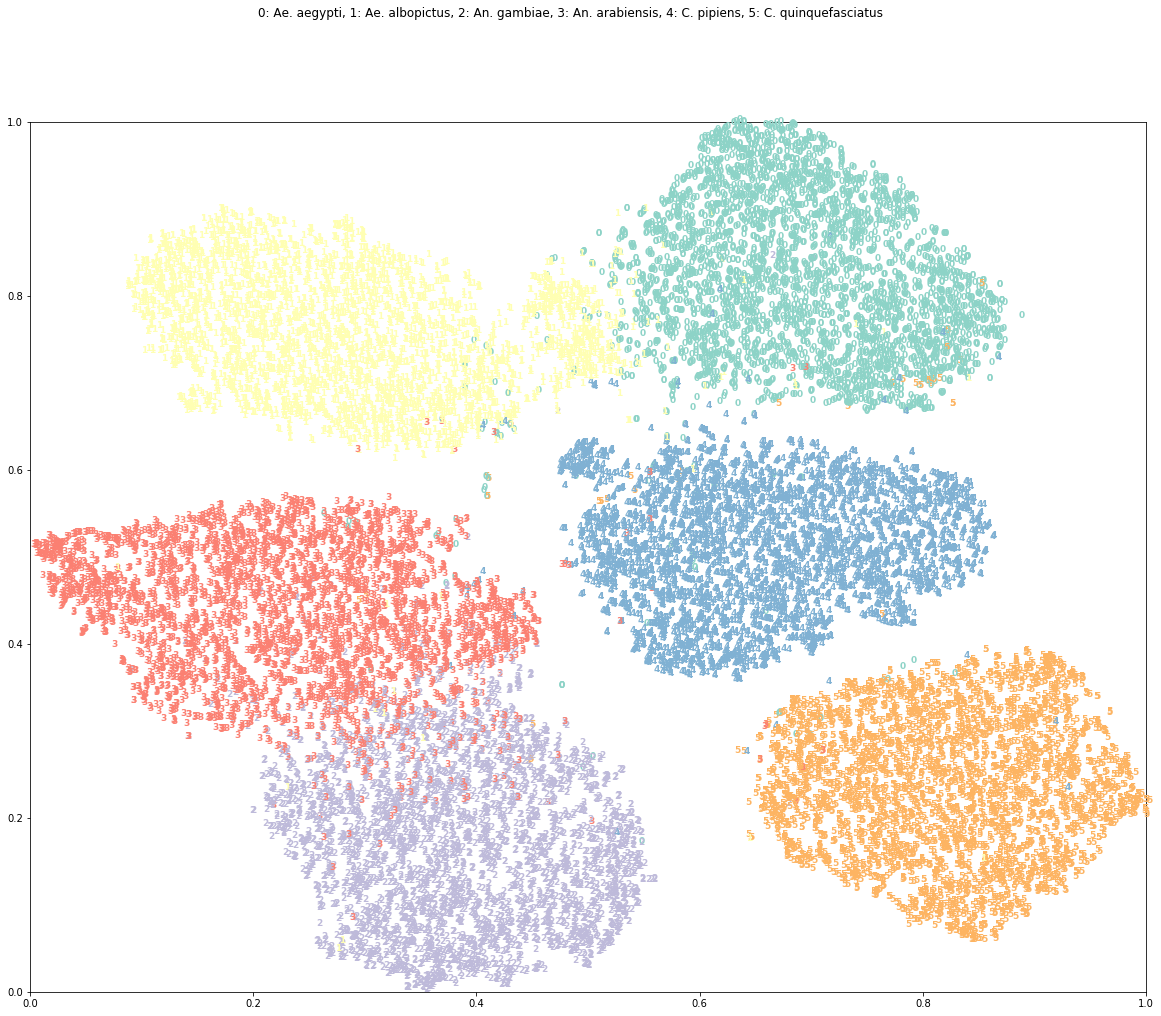

In [16]:
fig = plt.figure(figsize = (2*10, 2*8))
ax = fig.gca()

for i in range(X.shape[0]):
    ax.text(X[i, 0], X[i, 1], str(y[i]), color = plt.cm.Set3(y[i]), fontdict = {'weight': 'bold', 'size': 9})

fig.suptitle('0: Ae. aegypti, 1: Ae. albopictus, 2: An. gambiae, 3: An. arabiensis, 4: C. pipiens, 5: C. quinquefasciatus')

plt.show()